In [1]:
import os 
import pandas as pd

# Diretório que contém os arquivos
diretorio = 'C:/Users/labdi/Desktop/Sazonalidade/NM'

# Lista dos dataframes
dataframes = []

# Loop sobre os arquivos no diretório
for NM in os.listdir(diretorio):
    if NM.endswith('.dtf'):
        # Path completo do arquivo
        caminho_arquivo = os.path.join(diretorio, NM)
        
        # Verificar se é um arquivo e não um diretório
        if os.path.isfile(caminho_arquivo):
            # Ler o arquivo e adicionar ao dataframe à lista
            df = pd.read_table(caminho_arquivo, header=None, delim_whitespace=True)
            
            # Adicionar dataframe à lista
            dataframes.append(df)

# Verificar se foram encontrados arquivos .dtf
if len(dataframes) > 0:
    # Concatenar os dataframes em um único dataframe
    df_concatenado = pd.concat(dataframes)
    
    # Exibir o dataframe concatenado
    print(df_concatenado.head())
else:
    print("Nenhum arquivo .dtf encontrado no diretório especificado.")


C:\Users\labdi\AppData\Local\Temp\ipykernel_2176\2627513787.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(caminho_arquivo, header=None, delim_whitespace=True)
C:\Users\labdi\AppData\Local\Temp\ipykernel_2176\2627513787.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(caminho_arquivo, header=None, delim_whitespace=True)
C:\Users\labdi\AppData\Local\Temp\ipykernel_2176\2627513787.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(caminho_arquivo, header=None, delim_whitespace=True)
C:\Users\labdi\AppData\Local\Temp\ipykernel_2176\2627513787.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated a

       0     1  2  3    4     5  6
0      0  1954  1  1  0.0  9.99  1
1   3600  1954  1  1  1.0  9.99  1
2   7200  1954  1  1  2.0  9.99  1
3  10800  1954  1  1  3.0  9.99  1
4  14400  1954  1  1  4.0  9.99  1


C:\Users\labdi\AppData\Local\Temp\ipykernel_2176\2627513787.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(caminho_arquivo, header=None, delim_whitespace=True)
C:\Users\labdi\AppData\Local\Temp\ipykernel_2176\2627513787.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(caminho_arquivo, header=None, delim_whitespace=True)


In [2]:
# Renomear as colunas
df_concatenado.columns = ['tempo', 'ano', 'mes', 'dia', 'hora', 'nivel_do_mar', 'flag']

print(df_concatenado.head())



   tempo   ano  mes  dia  hora  nivel_do_mar  flag
0      0  1954    1    1   0.0          9.99     1
1   3600  1954    1    1   1.0          9.99     1
2   7200  1954    1    1   2.0          9.99     1
3  10800  1954    1    1   3.0          9.99     1
4  14400  1954    1    1   4.0          9.99     1


In [3]:
import numpy as np

#fazer um pequeno tratamento nos dados onde forem 9.990
df_concatenado.replace(9.99, np.nan, inplace=True)


In [4]:
print(df_concatenado)

      tempo   ano  mes  dia  hora  nivel_do_mar  flag
0         0  1954    1    1   0.0           NaN     1
1      3600  1954    1    1   1.0           NaN     1
2      7200  1954    1    1   2.0           NaN     1
3     10800  1954    1    1   3.0           NaN     1
4     14400  1954    1    1   4.0           NaN     1
...     ...   ...  ...  ...   ...           ...   ...
8764  14400  2007    1    1   4.0         1.974     0
8765  18000  2007    1    1   5.0         1.783     0
8766  21600  2007    1    1   6.0         1.632     0
8767  25200  2007    1    1   7.0         1.571     0
8768  28800  2007    1    1   8.0         1.490     0

[464601 rows x 7 columns]


In [5]:
#converter as colunas de data e hora para um projeto datetime
from datetime import datetime 

# Converter a coluna 'Hora' para o formato de hora convencional
df_concatenado['hora'] = df_concatenado['hora'].astype(int).astype(str) + ':00'

# Concatenar as colunas 'Ano', 'Mes', 'Dia' e 'Hora' em uma única string no formato 'Ano-Mês-Dia Hora'
df_concatenado['data_hora'] = df_concatenado['ano'].astype(str) + '-' + df_concatenado['mes'].astype(str) + '-' + df_concatenado['dia'].astype(str) + ' ' + df_concatenado['hora']

# Converter a coluna 'data_hora' para o formato de data e hora
df_concatenado['data_hora'] = pd.to_datetime(df_concatenado['data_hora'], format='%Y-%m-%d %H:%M')

# Exibir as primeiras linhas do DataFrame com a nova coluna 'data_hora'
print(df_concatenado.head())

   tempo   ano  mes  dia  hora  nivel_do_mar  flag           data_hora
0      0  1954    1    1  0:00           NaN     1 1954-01-01 00:00:00
1   3600  1954    1    1  1:00           NaN     1 1954-01-01 01:00:00
2   7200  1954    1    1  2:00           NaN     1 1954-01-01 02:00:00
3  10800  1954    1    1  3:00           NaN     1 1954-01-01 03:00:00
4  14400  1954    1    1  4:00           NaN     1 1954-01-01 04:00:00


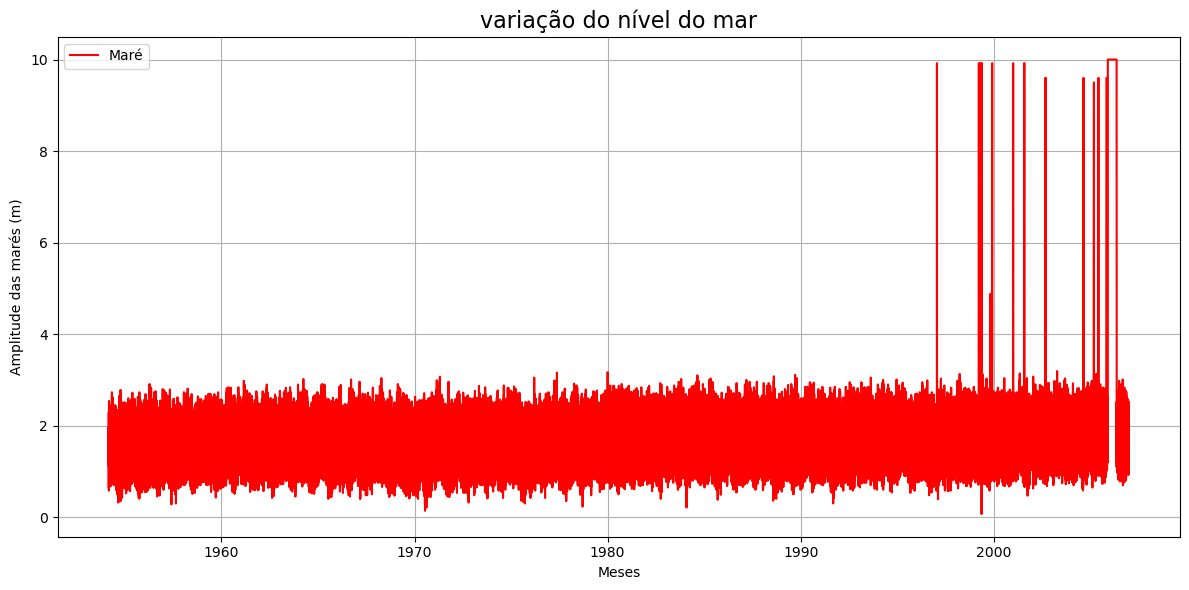

In [6]:
import matplotlib.pyplot as plt
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_concatenado['data_hora'], df_concatenado['nivel_do_mar'], 'r', label='Maré')

plt.title('variação do nível do mar', fontsize=16)
plt.legend(loc='best')
plt.xlabel('Meses')
plt.ylabel('Amplitude das marés (m)')
plt.grid(True)

plt.tight_layout()

In [7]:
#aplicar alguns filtros de media e o desvio padrão da coluna Nivel do mar
#calcular a média
mean_level = df_concatenado['nivel_do_mar'].mean()
#calcular o desvio padrão
std_desv = df_concatenado['nivel_do_mar'].std()

#definir os limites superior e inferior para eliminar os outlier
limite_superior = mean_level + 2 * std_desv
limite_inferior = mean_level - 2 * std_desv

#filtrar o dataframe para remover outliers
df_filtrado =df_concatenado[(df_concatenado['nivel_do_mar'] >= limite_inferior) & (df_concatenado['nivel_do_mar'] <= limite_superior)]


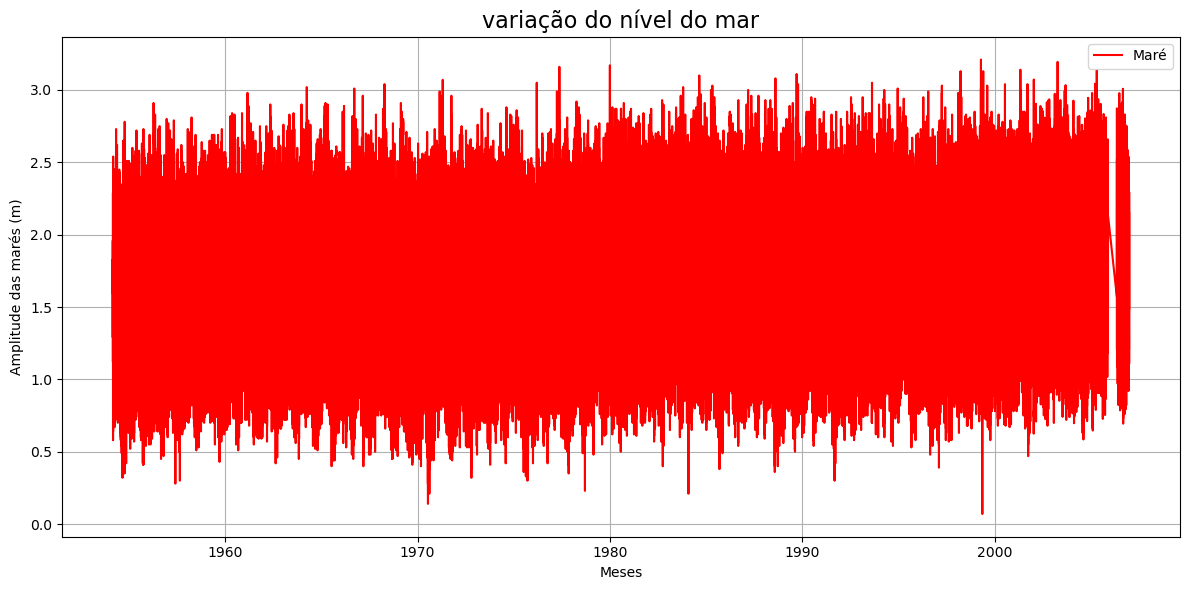

In [8]:
import matplotlib.pyplot as plt
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_filtrado['data_hora'], df_filtrado['nivel_do_mar'], 'r', label='Maré')

plt.title('variação do nível do mar', fontsize=16)
plt.legend(loc='best')
plt.xlabel('Meses')
plt.ylabel('Amplitude das marés (m)')
plt.grid(True)

plt.tight_layout()

In [9]:
#calcular a média da coluna 'maré'
media_level = df_filtrado['nivel_do_mar'].mean()
df_filtrado.loc[:, 'nivel_do_mar_01'] = df_filtrado['nivel_do_mar'] * 100 - media_level



print(df_filtrado)

        tempo   ano  mes  dia  hora  nivel_do_mar  flag           data_hora  \
1344  4838400  1954    2   26  0:00         1.600     0 1954-02-26 00:00:00   
1345  4842000  1954    2   26  1:00         1.670     0 1954-02-26 01:00:00   
1346  4845600  1954    2   26  2:00         1.870     0 1954-02-26 02:00:00   
1347  4849200  1954    2   26  3:00         1.860     0 1954-02-26 03:00:00   
1348  4852800  1954    2   26  4:00         1.850     0 1954-02-26 04:00:00   
...       ...   ...  ...  ...   ...           ...   ...                 ...   
8764    14400  2007    1    1  4:00         1.974     0 2007-01-01 04:00:00   
8765    18000  2007    1    1  5:00         1.783     0 2007-01-01 05:00:00   
8766    21600  2007    1    1  6:00         1.632     0 2007-01-01 06:00:00   
8767    25200  2007    1    1  7:00         1.571     0 2007-01-01 07:00:00   
8768    28800  2007    1    1  8:00         1.490     0 2007-01-01 08:00:00   

      nivel_do_mar_01  
1344       158.310253  
134

C:\Users\labdi\AppData\Local\Temp\ipykernel_2176\1687867896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.loc[:, 'nivel_do_mar_01'] = df_filtrado['nivel_do_mar'] * 100 - media_level


In [10]:
df_filtrado['data_hora'] = pd.to_datetime(df_filtrado['data_hora'])

C:\Users\labdi\AppData\Local\Temp\ipykernel_2176\4236500455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['data_hora'] = pd.to_datetime(df_filtrado['data_hora'])


In [11]:
media_mensal = df_filtrado.resample('M', on='data_hora')['nivel_do_mar_01'].mean()

C:\Users\labdi\AppData\Local\Temp\ipykernel_2176\1243942488.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = df_filtrado.resample('M', on='data_hora')['nivel_do_mar_01'].mean()


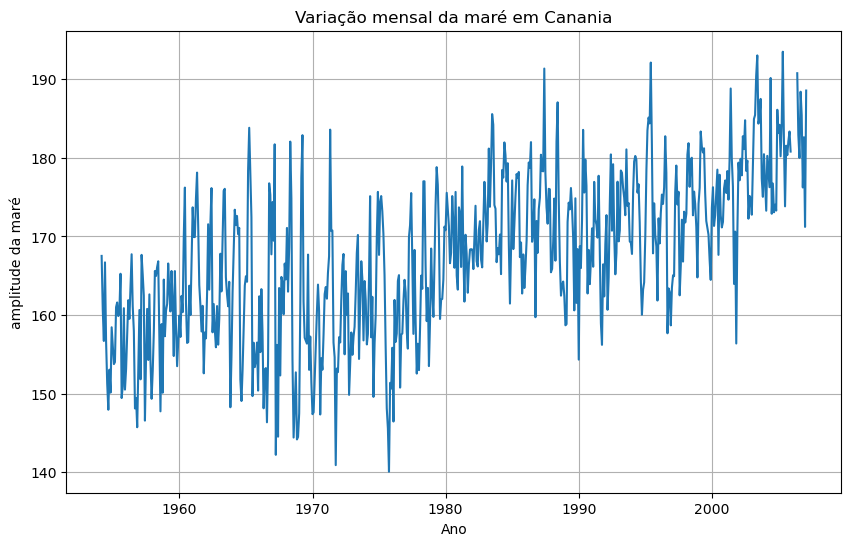

In [12]:
#plotar as médias diárias

# Cria um gráfico de linha
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.plot(media_mensal)
plt.title("Variação mensal da maré em Canania")
plt.xlabel("Ano")
plt.ylabel("amplitude da maré")
plt.grid(True)
plt.show()

In [13]:
# Cria um novo DataFrame com as médias mensais de'data_hora' e nivel_do_mar_01

df_mensal = pd.DataFrame({
    'data_hora': media_mensal.index,
    'nivel_do_mar_01': media_mensal.values
})

# Exibe o novo DataFrame com as médias mensais
print(df_mensal)

     data_hora  nivel_do_mar_01
0   1954-02-28       167.518587
1   1954-03-31       160.679877
2   1954-04-30       156.692198
3   1954-05-31       166.696006
4   1954-06-30       156.668587
..         ...              ...
631 2006-09-30       185.440948
632 2006-10-31       176.229743
633 2006-11-30       182.620670
634 2006-12-31       171.211732
635 2007-01-31       188.565809

[636 rows x 2 columns]


In [14]:
# Converter a coluna 'data_hora' para o formato datetime
df_mensal['data_hora'] = pd.to_datetime(df_mensal['data_hora'])

In [15]:
df_mensal['nivel_do_mar_interp'] = df_mensal['nivel_do_mar_01'].interpolate(method='linear')
df_mensal['nivel_do_mar_interp'].fillna(df_mensal['nivel_do_mar_interp'].mean(), inplace=True)


C:\Users\labdi\AppData\Local\Temp\ipykernel_2176\3760122685.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mensal['nivel_do_mar_interp'].fillna(df_mensal['nivel_do_mar_interp'].mean(), inplace=True)


In [16]:
# Construir a matriz A0 para regressão linear
A0 = np.column_stack([np.ones(len(df_mensal)), df_mensal['data_hora'].apply(lambda x: x.to_julian_date())])
X0 = np.linalg.lstsq(A0, df_mensal['nivel_do_mar_interp'], rcond=None)[0]
tendencia = A0.dot(X0)

In [17]:
import pandas as pd
from scipy.stats import linregress

# Convertendo a coluna de data_hora para o ano
df_mensal['ano'] = df_mensal['data_hora'].dt.year

# Calculando a regressão linear
slope, intercept, r_value, p_value, std_err = linregress(df_mensal['ano'], df_mensal['nivel_do_mar_interp'])

# Tendência por ano (inclinação da reta)
tendencia_por_ano = slope

# Grau de incerteza
incerteza = std_err


print("Tendência por ano:", tendencia_por_ano)
print("Incerteza:", incerteza)


Tendência por ano: 0.4320906329234284
Incerteza: 0.020107567148819054


In [18]:
print(len(tendencia))

636


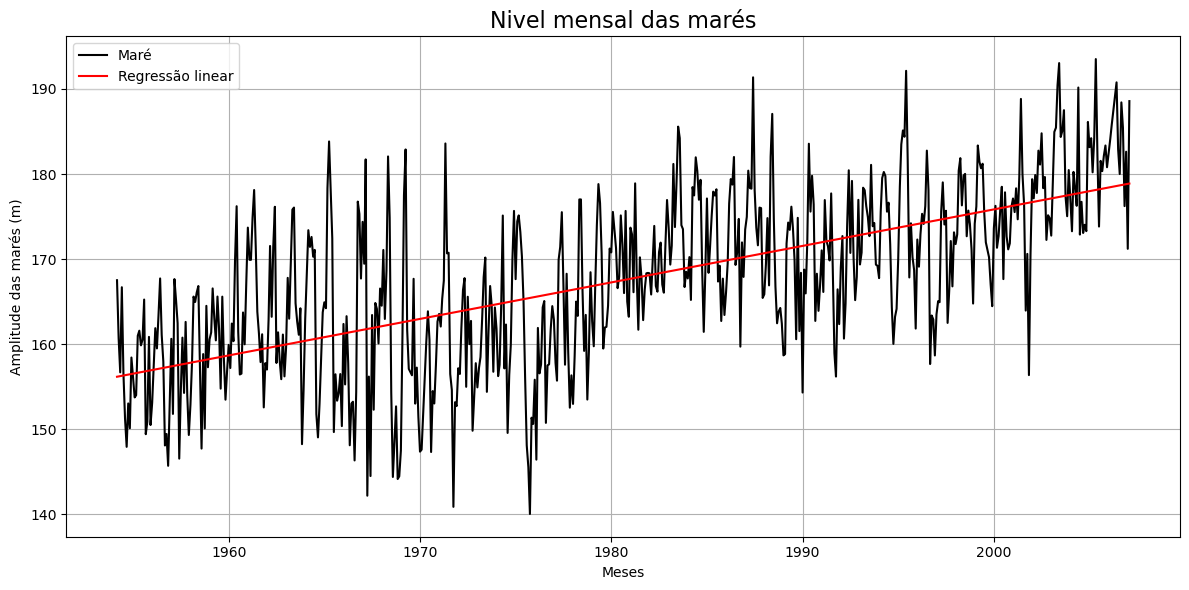

In [19]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_mensal['data_hora'], df_mensal['nivel_do_mar_interp'], 'k', label='Maré')
plt.plot(df_mensal['data_hora'], tendencia, 'r', label='Regressão linear')

# Adicionando texto para representar a tendência anual e sua incerteza
#texto_tendencia = 'Tendência anual: 0.43 ± 0.02 cm/ano'

plt.title('Nivel mensal das marés', fontsize=16)
plt.legend(loc='best')
plt.xlabel('Meses')
plt.ylabel('Amplitude das marés (m)')
plt.grid(True)

plt.tight_layout()

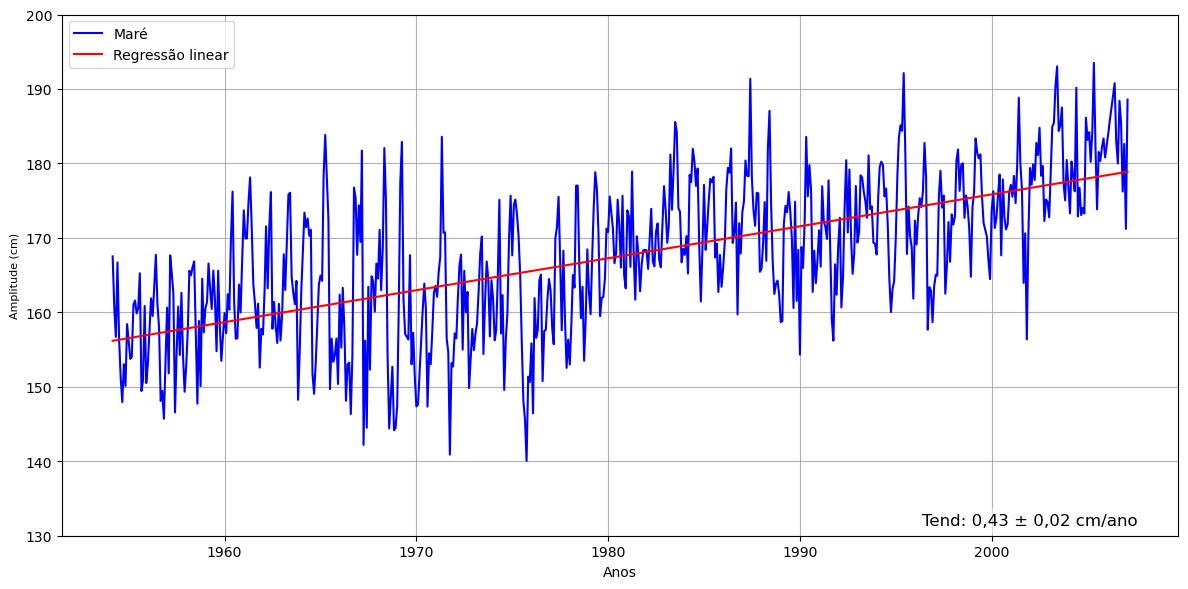

In [102]:
# Importe a biblioteca Matplotlib
import matplotlib.pyplot as plt

# Resolução desejada
dpi = 300
Trend = '0,43 ± 0,02'  # Defina o valor da tendência

# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_mensal['data_hora'], df_mensal['nivel_do_mar_interp'], 'b', label='Maré')
#plt.plot(df_mensal['data_hora'], df_mensal['nivel_do_mar_interp'], linestyle='--', color='b', label='Maré')  # Corrigido aqui
#plt.plot(df_mensal['data_hora'], tendencia, 'r', label='Regressão linear', 'lineWidth', 1.5)
plt.plot(df_mensal['data_hora'], tendencia, 'r', label='Regressão linear', linewidth=1.5)


# Adicione o valor da tendência linear abaixo da legenda
plt.text(0.77, 0.02, f'Tend: {Trend} cm/ano', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='w', edgecolor='none', alpha=0.5))

#plt.title('Nível médio anual mar em Cananéia', fontsize=12)
plt.legend(loc='best')
plt.xlabel('Anos')
plt.ylabel('Amplitude (cm)', fontsize=8)
plt.grid(True)
# Define os limites e os marcadores dos eixos y
plt.ylim(130 , 200)
plt.yticks(range(130, 201, 10))
# Define o formato do eixo x para mostrar anos e meses (AAAA, MM)
# Salvar a figura
#plt.savefig('D:/graficos/Tendencia/nivel_medio_mensal_do_mar_semtitulo.png', dpi=dpi)  # Salva a figura com a resolução especificada


plt.tight_layout()
plt.show()


In [104]:
df_mensal.to_csv('D:/Sazonalidade/dataframe_sazonalidades/tend_Cananéia.csv', index=False)

In [103]:
import numpy as np

# Calcule o desvio padrão da série de dados 'alt_zero'
desvio = np.std(df_mensal['nivel_do_mar_interp'])

# Exiba o desvio padrão
print("Desvio padrão:", desvio)

Desvio padrão: 10.183547060296096


In [20]:
# Calcular a média móvel de 12 períodos com janelas centradas
df_mensal['Media_Movel_12'] = df_mensal['nivel_do_mar_interp'].rolling(window=12, center=True).sum()

In [21]:
df_mensal['Media_Movel_2_Centrada'] = df_mensal['Media_Movel_12'].rolling(window=2, center=True).sum()

In [22]:
# Calculando a média móvel centrada dividida por 24
df_mensal['Media_Movel_Centrada'] = df_mensal['Media_Movel_2_Centrada'] / 24

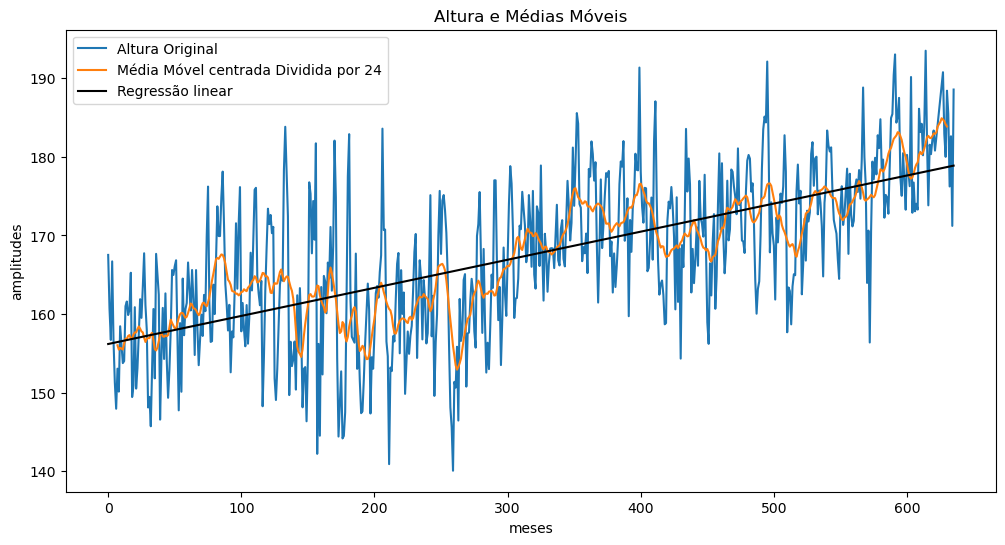

In [23]:
# Plotar as alturas originais
plt.figure(figsize =(12, 6))
plt.plot(df_mensal['nivel_do_mar_interp'], label='Altura Original')

# Plotar a média móvel de período 12
#plt.plot(data['Media_Movel_12'], label='Média Móvel de 12 Períodos')

# Plotar a média móvel centrada dividida por 24
#plt.plot(data['Media_Movel_2_Centrada'], label='Média Móvel 2 Centrada ')

plt.plot(df_mensal['Media_Movel_Centrada'], label= 'Média Móvel centrada Dividida por 24')
plt.plot(tendencia, 'k', label='Regressão linear')
# Adicionar rótulos e legendas
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Altura e Médias Móveis')
plt.legend()

# Mostrar o gráfico
plt.show()

In [24]:
# Calcular os índices sazonais subtraindo a média móvel centrada da altura original
df_mensal['indices_sazonais'] = df_mensal['nivel_do_mar_interp'] - df_mensal['Media_Movel_Centrada']

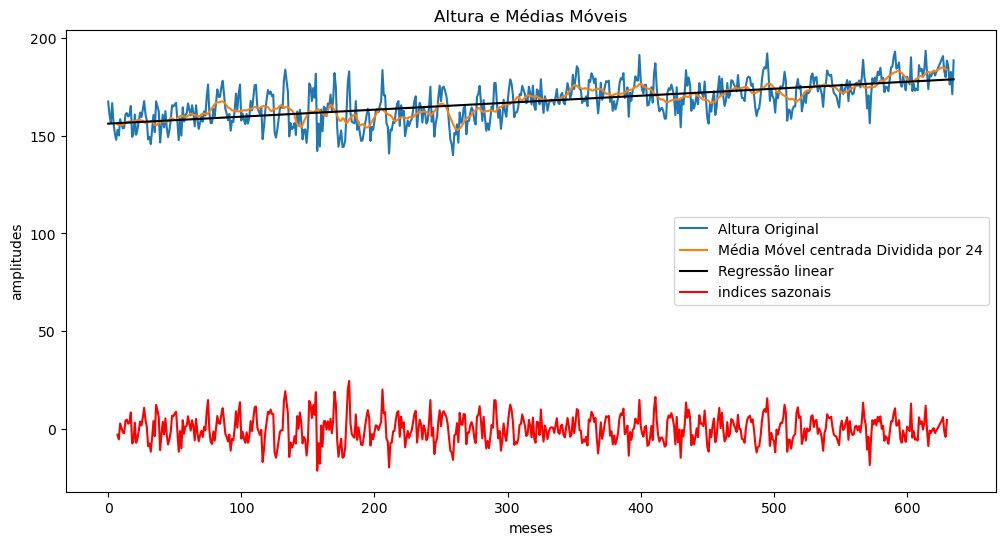

In [25]:
# Plotar as alturas originais
plt.figure(figsize=(12, 6))
# Plotar as alturas originais
plt.plot(df_mensal['nivel_do_mar_interp'], label='Altura Original')


plt.plot(df_mensal['Media_Movel_Centrada'], label= 'Média Móvel centrada Dividida por 24')
plt.plot(tendencia, 'k', label='Regressão linear')
# Adicionar rótulos e legendas

plt.plot(df_mensal['indices_sazonais'], 'r', label='indices sazonais')
# Adicionar rótulos e legendas
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Altura e Médias Móveis')
plt.legend()

# Mostrar o gráfico
plt.show()

In [26]:
#filtrar os dados para cada mês toda serie temporal
mensal01 = df_mensal['data_hora'].dt.month

In [27]:
#adicionar acoluna de meses no Dataframe como 'mensal'
df_mensal['mensal'] = df_mensal['data_hora'].dt.month

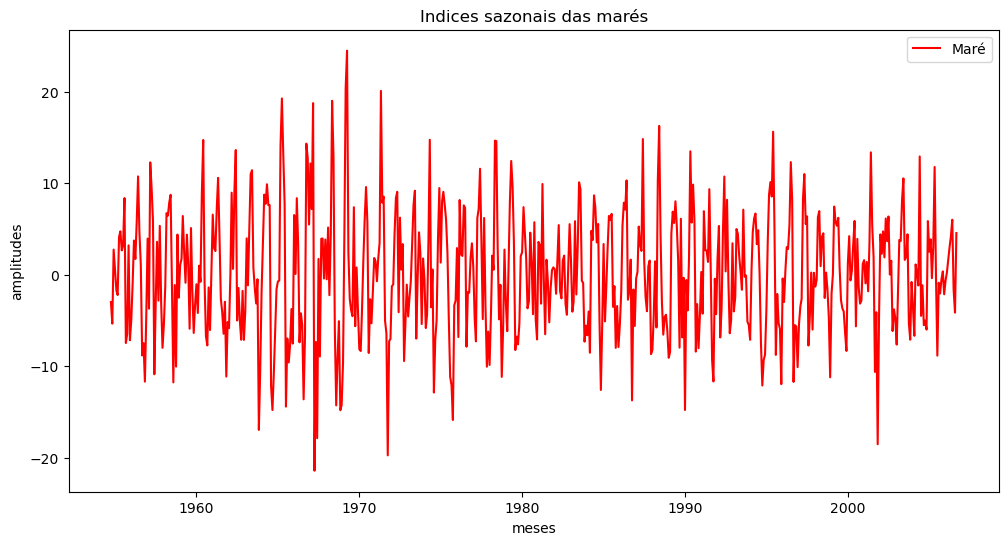

In [28]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_mensal['data_hora'], df_mensal['indices_sazonais'], 'r', label='Maré')
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Indices sazonais das marés')
plt.legend()

# Mostrar o gráfico
plt.show()

In [29]:
#liste de nomes dos meses 
meses = ['dezembro', 'janeiro', 'fevereiro', 
        'março', 'abril', 'maio',
        'junho', 'julho', 'agosto',
        'setembro', 'outubro', 'novembro']
# dicionário para armazenar os filtros de cada mês
filtros_meses = {}

# loop através dos meses
for mes in range(1, 13):
    #filtrar os dados para incluir apenas o mês atual
    filtros_meses[meses[mes-1]] = df_mensal[df_mensal['data_hora'].dt.month == mes]

#dicionário para armazenar as médias dos indices sazonais para cada meês
medias_ind_sazonal = {}
for mes in meses:
    #calcular a media dos índices sazonais para o mês atual
    medias_ind_sazonal[mes] = filtros_meses[mes]['indices_sazonais'].mean()

In [30]:
medias_ind_sazonal

{'dezembro': -0.716134610937001,
 'janeiro': 3.09022098467154,
 'fevereiro': 4.201254916570004,
 'março': 6.059734302922128,
 'abril': 5.655715994649063,
 'maio': 1.713129434995944,
 'junho': -2.4188339904179506,
 'julho': -3.3295643307824916,
 'agosto': -4.2787251444323555,
 'setembro': -4.556809949736834,
 'outubro': -3.194615569493913,
 'novembro': -1.5584380173817185}

In [31]:
#criar um novo dataframe para e transfromar o dicionario em conjuntos

# Criando o DataFrame
df1 = pd.DataFrame(list(medias_ind_sazonal.items()), columns=['mes_nome', 'media_indice_sazonal'])
df1

,mes_nome,media_indice_sazonal
0,dezembro,-0.716135
1,janeiro,3.090221
2,fevereiro,4.201255
3,março,6.059734
4,abril,5.655716
5,maio,1.713129
6,junho,-2.418834
7,julho,-3.329564
8,agosto,-4.278725
9,setembro,-4.556810


In [32]:
#Fazendo a soma, para que dei 0 segundo a definição do modelo adetivo o somatorio das média dos indices sazonais tem que ser igual a zero
soma_md_indices = sum(df1['media_indice_sazonal'])

In [33]:
#calcular o excesso
excesso = soma_md_indices/12
excesso

0.05557783505220119

In [34]:
#indices corrigidos
df1['media_indice_corrigido'] = df1['media_indice_sazonal'] - excesso
df1

,mes_nome,media_indice_sazonal,media_indice_corrigido
0,dezembro,-0.716135,-0.771712
1,janeiro,3.090221,3.034643
2,fevereiro,4.201255,4.145677
3,março,6.059734,6.004156
4,abril,5.655716,5.600138
5,maio,1.713129,1.657552
6,junho,-2.418834,-2.474412
7,julho,-3.329564,-3.385142
8,agosto,-4.278725,-4.334303
9,setembro,-4.556810,-4.612388


In [35]:
import scipy.io as sio
# Salvar o DataFrame em um arquivo .mat
sio.savemat('Cananeia.mat', {'Cananeia': df1.to_dict(orient='list')})

In [36]:
#df1.to_csv('D:/Sazonalidade/dataframe_sazonalidades/sazonalidade_Cananéia.csv', index=False)

In [37]:
sum(df1['media_indice_corrigido'])

4.440892098500626e-16

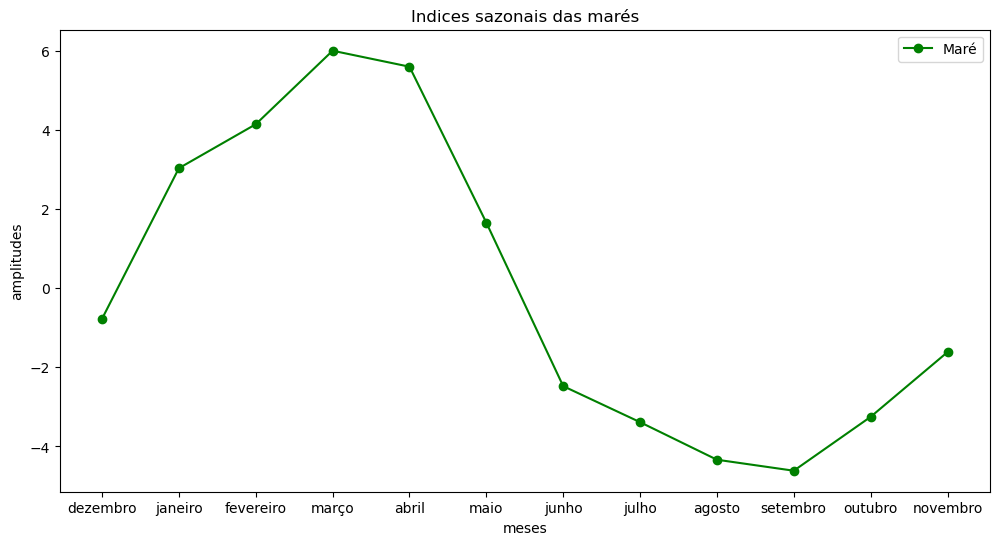

In [38]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df1['mes_nome'], df1['media_indice_corrigido'], marker='o', color='g', label='Maré') 
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Indices sazonais das marés')
plt.legend()

# Mostrar o gráfico
plt.show()

In [39]:
# Supondo que 'data' seja o nome do seu DataFrame
df_mensal['data_hora'] = pd.to_datetime(df_mensal['data_hora'])

# Criando a nova coluna 'anomes' no formato YYYY-MM
df_mensal['anomes'] = df_mensal['data_hora'].dt.strftime('%Y-%m')

In [40]:
# Dicionário para mapear nome do mês para número do mês
meses = {
    'janeiro': 1,
    'fevereiro': 2,
    'março': 3,
    'abril': 4,
    'maio': 5,
    'junho': 6,
    'julho': 7,
    'agosto': 8,
    'setembro': 9,
    'outubro': 10,
    'novembro': 11,
    'dezembro': 12
}
# Mapeando o nome do mês para o número do mês usando o dicionário 'meses'
df1['mes'] = df1['mes_nome'].map(meses)

#ordenando os meses pra ficar bonitinho
df1 = df1.sort_values(by='mes')

In [41]:
#Criando a nova coluna e adcionando a média pra cada respectivo mês do df
df_mensal['indices_sazonais'] = df_mensal['mensal'].map(df1.set_index('mes')['media_indice_corrigido'])

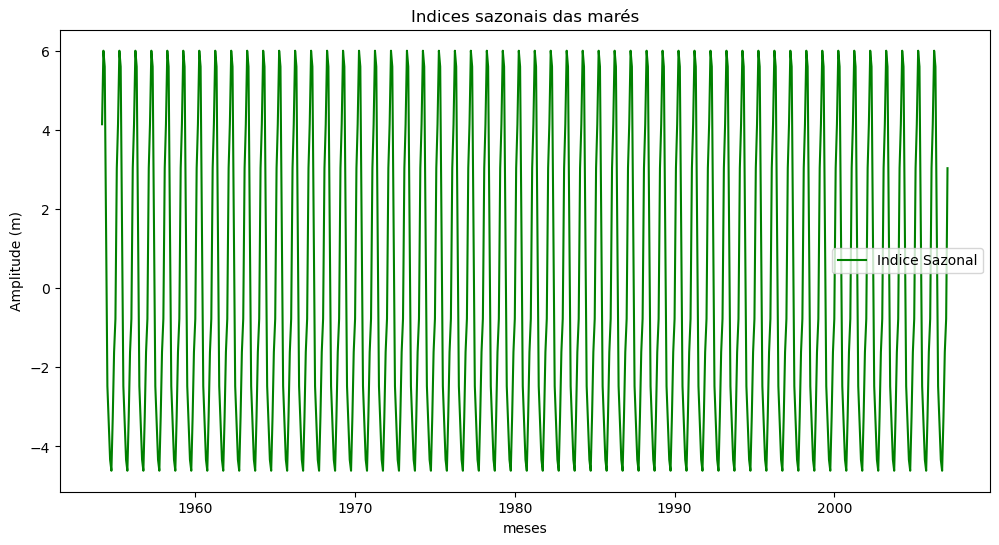

In [42]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_mensal['data_hora'], df_mensal['indices_sazonais'], 'g', label='Indice Sazonal')
plt.xlabel('meses')
plt.ylabel('Amplitude (m)')
plt.title('Indices sazonais das marés')
plt.legend()

# Mostrar o gráfico
plt.show()

In [43]:
# ciclo anual
df_mensal['ciclo_anual'] = df_mensal['nivel_do_mar_interp'] - tendencia - df_mensal['indices_sazonais']

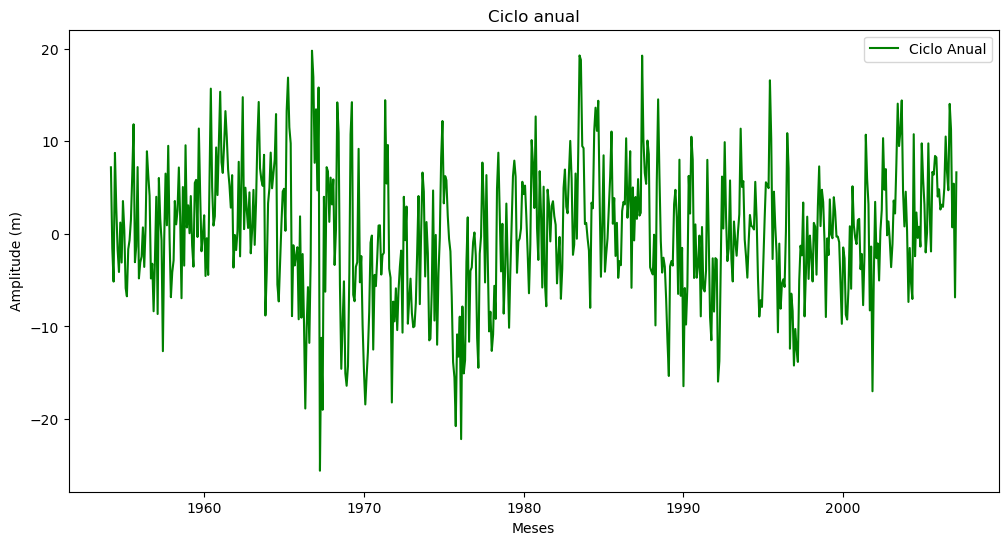

In [44]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_mensal['data_hora'], df_mensal['ciclo_anual'], 'g', label='Ciclo Anual')
plt.xlabel('Meses')
plt.ylabel('Amplitude (m)')
plt.title('Ciclo anual')
plt.legend()

# Mostrar o gráfico
plt.show()

In [45]:
df_filtrado

,tempo,ano,mes,dia,hora,nivel_do_mar,flag,data_hora,nivel_do_mar_01
1344,4838400,1954,2,26,0:00,1.600,0,1954-02-26 00:00:00,158.310253
1345,4842000,1954,2,26,1:00,1.670,0,1954-02-26 01:00:00,165.310253
1346,4845600,1954,2,26,2:00,1.870,0,1954-02-26 02:00:00,185.310253
1347,4849200,1954,2,26,3:00,1.860,0,1954-02-26 03:00:00,184.310253
1348,4852800,1954,2,26,4:00,1.850,0,1954-02-26 04:00:00,183.310253
...,...,...,...,...,...,...,...,...,...
8764,14400,2007,1,1,4:00,1.974,0,2007-01-01 04:00:00,195.710253
8765,18000,2007,1,1,5:00,1.783,0,2007-01-01 05:00:00,176.610253
8766,21600,2007,1,1,6:00,1.632,0,2007-01-01 06:00:00,161.510253
8767,25200,2007,1,1,7:00,1.571,0,2007-01-01 07:00:00,155.410253


In [46]:
df_mensal

,data_hora,nivel_do_mar_01,nivel_do_mar_interp,ano,Media_Movel_12,Media_Movel_2_Centrada,Media_Movel_Centrada,indices_sazonais,mensal,anomes,ciclo_anual
0,1954-02-28,167.518587,167.518587,1954,NaN,NaN,NaN,4.145677,2,1954-02,7.194599
1,1954-03-31,160.679877,160.679877,1954,NaN,NaN,NaN,6.004156,3,1954-03,-1.538999
2,1954-04-30,156.692198,156.692198,1954,NaN,NaN,NaN,5.600138,4,1954-04,-5.157894
3,1954-05-31,166.696006,166.696006,1954,NaN,NaN,NaN,1.657552,5,1954-05,8.752092
4,1954-06-30,156.668587,156.668587,1954,NaN,NaN,NaN,-2.474412,6,1954-06,2.821402
...,...,...,...,...,...,...,...,...,...,...,...
631,2006-09-30,185.440948,185.440948,2006,NaN,NaN,NaN,-4.612388,9,2006-09,11.316972
632,2006-10-31,176.229743,176.229743,2006,NaN,NaN,NaN,-3.250193,10,2006-10,0.707164
633,2006-11-30,182.620670,182.620670,2006,NaN,NaN,NaN,-1.614016,11,2006-11,5.426679
634,2006-12-31,171.211732,171.211732,2006,NaN,NaN,NaN,-0.771712,12,2006-12,-6.860971


In [47]:
from scipy.io import savemat

# Supondo que 'df_mensal' é o seu DataFrame com as colunas 'anomes' e 'ciclo_anual'

# Converter DataFrame para dicionário
dados_para_salvar = {
    'anomes': df_mensal['anomes'].values,
    'ciclo_anual': df_mensal['ciclo_anual'].values
}

# Exportar para um arquivo .mat
savemat('dados_anomes_ciclo_anual.mat', dados_para_salvar)


In [48]:
import pandas as pd

# Supondo que você já tenha carregado seus dados em um DataFrame chamado df

# Converter a coluna 'data_hora' para datetime
df_mensal['data_hora'] = pd.to_datetime(df_mensal['data_hora'])

# Extrair o ano de cada data
df_mensal['ano'] = df_mensal['data_hora'].dt.year

# Calcular a média anual para cada ano
media_anual_por_ano = df_mensal.groupby('ano')['nivel_do_mar_01'].mean()

# Calcular a variabilidade interanual (desvio padrão das médias anuais)
variabilidade_interanual = media_anual_por_ano.std()

print("Variabilidade Interanual:", variabilidade_interanual)


Variabilidade Interanual: 7.876824643785911


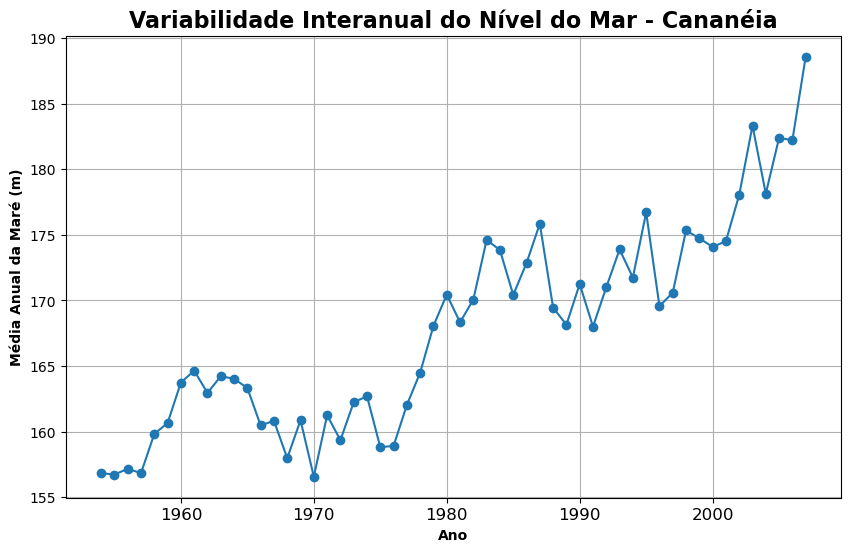

In [49]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(media_anual_por_ano.index, media_anual_por_ano.values, marker='o', linestyle='-')
plt.title('Variabilidade Interanual do Nível do Mar - Cananéia', fontsize=16, fontweight='bold')
plt.xlabel('Ano', fontweight='bold')
plt.ylabel('Média Anual da Maré (m)', fontweight='bold')
plt.xticks(fontsize=12)  # Ajuste o tamanho da fonte dos rótulos no eixo x
plt.grid(True)
plt.show()

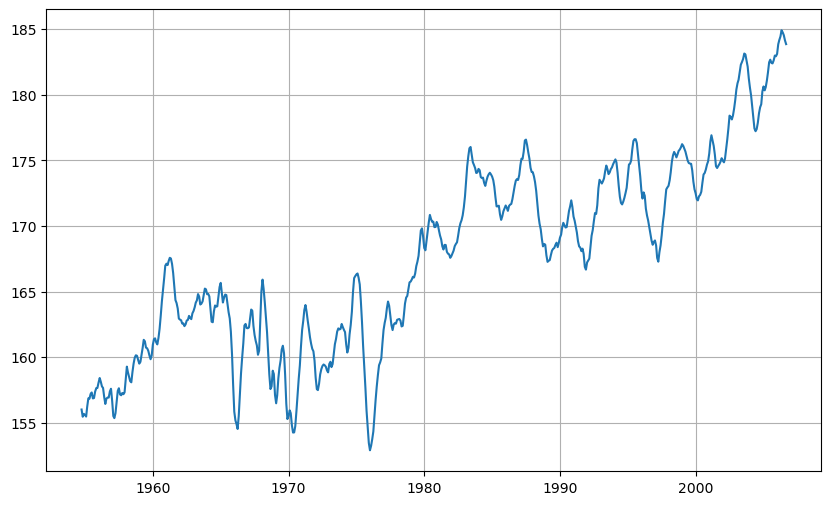

In [50]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_mensal['data_hora'], df_mensal['Media_Movel_Centrada'], label= 'Média Móvel centrada Dividida por 24')
#plt.plot(tendencia, 'k', label='Regressão linear')
# Adicionar rótulos e legendas
plt.grid(True)
plt.show()

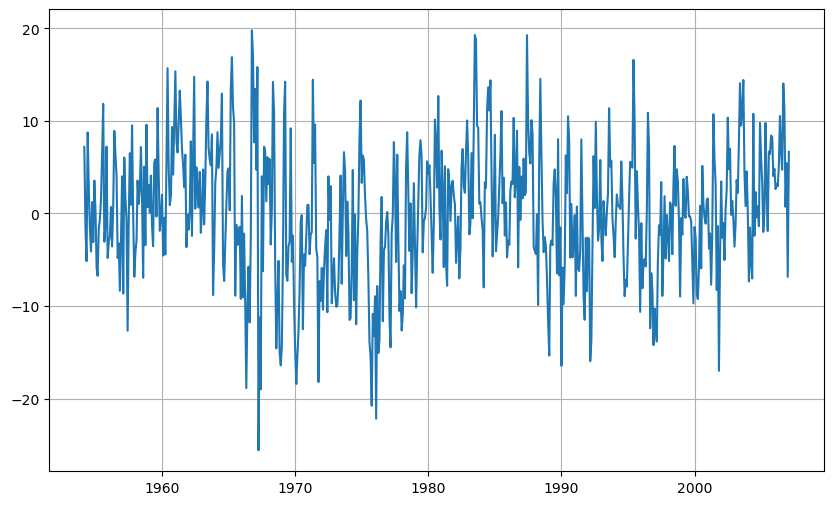

In [51]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_mensal['data_hora'], df_mensal['ciclo_anual'], label= 'ciclo anual das marés')
#plt.plot(tendencia, 'k', label='Regressão linear')
# Adicionar rótulos e legendas
plt.grid(True)
plt.show()

In [52]:
df_mensal.to_csv('D:/Sazonalidade/dataframe_sazonalidades/variação_interna_Cananéia.csv', index=False)


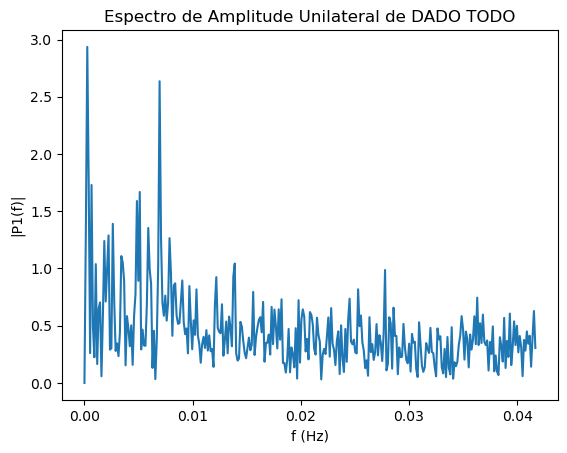

In [53]:
Fs = 1 / 12  # Frequência de amostragem                    
T = 1 / Fs  # Período de amostragem       
L = len(df_mensal['ciclo_anual'])  # Comprimento do sinal mensal
t = np.arange(0, L) * T  # Vetor de tempo

# Calcular a Transformada de Fourier
fft_altura = np.fft.fft(df_mensal['ciclo_anual'])
P2 = np.abs(fft_altura / L)
P1 = P2[0:L//2+1]
P1[1:-1] = 2 * P1[1:-1]

# Frequências
f = Fs * np.arange(0, L//2+1) / L

# Plotar o espectro de amplitude unidirecional
plt.figure(2)
plt.plot(f, P1)
plt.title('Espectro de Amplitude Unilateral de DADO TODO')
plt.xlabel('f (Hz)')
plt.ylabel('|P1(f)|')
plt.show()

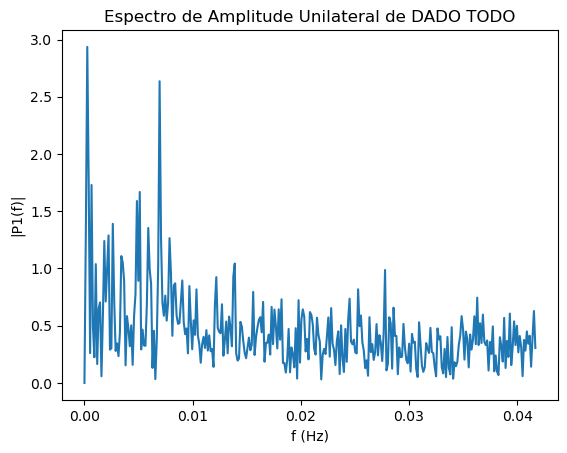

In [54]:
l_1ano = 8760;            # Length of 1 ANO
t = np.arange(0, l_1ano) * T  # Vetor de tempo

l_ano = len(df_mensal['ciclo_anual'])  # Comprimento do sinal
t = np.arange(0, l_ano) * T  # Vetor de tempo

# Calcular a Transformada de Fourier
fft_altura_ano = np.fft.fft(df_mensal['ciclo_anual'])
P2_ano = np.abs(fft_altura_ano / l_ano)
P1_ano = P2_ano[0:l_ano//2+1]
P1_ano[1:-1] = 2 * P1_ano[1:-1]


# Frequências
f_ano = Fs * np.arange(0, l_ano//2+1) / l_ano

# Plotar o espectro de amplitude unidirecional
plt.figure(2)
plt.plot(f_ano, P1_ano)
plt.title('Espectro de Amplitude Unilateral de DADO TODO')
plt.xlabel('f (Hz)')
plt.ylabel('|P1(f)|')
plt.show()

In [55]:
import numpy as np
# Frequências
f = Fs * np.arange(0, L//2+1) / L
periodos = 1 / f  # Calcular os períodos correspondentes às frequências

# Exibir as frequências e seus períodos
print('Frequências (ciclos por mês):')
print(f)
print('Períodos (meses):')
print(periodos)


Frequências (ciclos por mês):
[0.         0.00013103 0.00026205 0.00039308 0.00052411 0.00065514
 0.00078616 0.00091719 0.00104822 0.00117925 0.00131027 0.0014413
 0.00157233 0.00170335 0.00183438 0.00196541 0.00209644 0.00222746
 0.00235849 0.00248952 0.00262055 0.00275157 0.0028826  0.00301363
 0.00314465 0.00327568 0.00340671 0.00353774 0.00366876 0.00379979
 0.00393082 0.00406184 0.00419287 0.0043239  0.00445493 0.00458595
 0.00471698 0.00484801 0.00497904 0.00511006 0.00524109 0.00537212
 0.00550314 0.00563417 0.0057652  0.00589623 0.00602725 0.00615828
 0.00628931 0.00642034 0.00655136 0.00668239 0.00681342 0.00694444
 0.00707547 0.0072065  0.00733753 0.00746855 0.00759958 0.00773061
 0.00786164 0.00799266 0.00812369 0.00825472 0.00838574 0.00851677
 0.0086478  0.00877883 0.00890985 0.00904088 0.00917191 0.00930294
 0.00943396 0.00956499 0.00969602 0.00982704 0.00995807 0.0100891
 0.01022013 0.01035115 0.01048218 0.01061321 0.01074423 0.01087526
 0.01100629 0.01113732 0.01126834 

C:\Users\labdi\AppData\Local\Temp\ipykernel_2176\243524433.py:4: RuntimeWarning: divide by zero encountered in divide
  periodos = 1 / f  # Calcular os períodos correspondentes às frequências


In [56]:
from scipy.signal import find_peaks

# Encontrar picos nos dados de amplitude
picos, locs = find_peaks(P1)
